# Home Credit Indonesia Data Scientist Virtual Internship Program

### Problem Statement 
Ensure that customers who are able to make repayments are not rejected when applying for a loan, and that loans are provided with a principal, maturity, and repayment calendar that will motivate customers to succeed.

### Goal
minimizing clients who can actually make repayments are not rejected by Home Credit Indonesia.

### Objective
create a model that can predict whether customers will not have repayment problems

### Machine Learning Model
1. Logistic regression
2. SVM
3. Random Forest Classifier

### Import All NecessaryLibrary

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold, cross_val_score

### Load Dataset

In [2]:
data_train = pd.read_csv('home credit default risk/application_train.csv')
data_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### Checking the dataset

In [3]:
data_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [4]:
data_train.duplicated().sum()

0

In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


### Data Pre-Processing

#### Converting DAYS_BIRTH and DAYS_EMPLOYED to years 

In [6]:
data_train['AGE'] = data_train['DAYS_BIRTH']//-365
data_train.drop(columns=['DAYS_BIRTH'], inplace=True)

data_train['YEARS_EMPLOYED'] = data_train['DAYS_EMPLOYED']//-365
data_train.drop(columns=['DAYS_EMPLOYED'], inplace=True)
data_train['YEARS_EMPLOYED'].replace({data_train['YEARS_EMPLOYED'].min(): np.nan}, inplace=True)

In [77]:
total = data_train.isnull().sum().sort_values(ascending = False)
percent = (data_train.isnull().sum()/data_train.isnull().count()*100).sort_values(ascending = False)

missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).reset_index()
missing_data.loc[missing_data['Percent'] >40]

,index,Total,Percent
0,COMMONAREA_AVG,214865,69.872297
1,COMMONAREA_MODE,214865,69.872297
2,COMMONAREA_MEDI,214865,69.872297
3,NONLIVINGAPARTMENTS_AVG,213514,69.432963
4,NONLIVINGAPARTMENTS_MEDI,213514,69.432963
5,NONLIVINGAPARTMENTS_MODE,213514,69.432963
6,FONDKAPREMONT_MODE,210295,68.386172
7,LIVINGAPARTMENTS_MODE,210199,68.354953
8,LIVINGAPARTMENTS_AVG,210199,68.354953
9,LIVINGAPARTMENTS_MEDI,210199,68.354953


#### Missing Value and Drop Features
I will drop any columns that contains more than 40% of missing value

In [8]:
limit = int(0.4 * data_train.shape[0])
na_total = data_train.isna().sum()

# Drop column 
drop_col = na_total.where(na_total>=limit).dropna().index
data_train_drop = data_train.drop(drop_col, axis=1)

data_train_drop

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45,3.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,52,8.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,54,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,25,0.0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,56,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,1.0,0.0,0.0,1.0,0.0,1.0,41,21.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,32,13.0


In [9]:
#drop additional columns
data_train_drop = data_train_drop.drop([f"FLAG_DOCUMENT_{x}" for x in range(2, 22)], axis=1)
data_train_drop

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,25,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,45,3.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,52,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN,52,8.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,54,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0.0,-273.0,NaN,NaN,NaN,NaN,NaN,NaN,25,0.0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,56,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0.0,-1909.0,1.0,0.0,0.0,1.0,0.0,1.0,41,21.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0.0,-322.0,0.0,0.0,0.0,0.0,0.0,0.0,32,13.0


#### Fill the missing value on the remaining features

In [10]:
def miss_numerical(data):
    
    numerical_features = data.select_dtypes(exclude = ["object"]).columns
    for i in numerical_features:
        data[i] = data[i].fillna(data[i].median())
    return data

def miss_categorical(data):
    
    categorical_features = data.select_dtypes(include = ["object"]).columns
    for i in categorical_features:
        data[i] = data[i].fillna(data[i].mode()[0])
    return data

def transform_feature(data):
    data = miss_numerical(data)
    data = miss_categorical(data)
    return data

data_train_drop = transform_feature(data_train_drop)
pd.set_option("max_columns", None)
data_train_drop

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,25,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,45,3.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,52,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.535276,2.0,0.0,2.0,0.0,-617.0,0.0,0.0,0.0,0.0,0.0,1.0,52,8.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.535276,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,54,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-8456.0,-1982,1,1,0,1,0,0,Sales staff,1.0,1,1,THURSDAY,15,0,0,0,0,0,0,Services,0.681632,0.535276,0.0,0.0,0.0,0.0,-273.0,0.0,0.0,0.0,0.0,0.0,1.0,25,0.0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-4388.0,-4090,1,0,0,1,1,0,Laborers,1.0,2,2,MONDAY,8,0,0,0,0,0,0,XNA,0.115992,0.535276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,56,4.0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,-6737.0,-5150,1,1,0,1,0,1,Managers,1.0,3,3,THURSDAY,9,0,0,0,0,1,1,School,0.535722,0.218859,6.0,0.0,6.0,0.0,-1909.0,1.0,0.0,0.0,1.0,0.0,1.0,41,21.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.005313,-2562.0,-931,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,9,0,0,0,1,1,0,Business Entity Type 1,0.514163,0.661024,0.0,0.0,0.0,0.0,-322.0,0.0,0.0,0.0,0.0,0

#### Encoding any categorical features

In [11]:
# Encode the categorical columns
encoder = {}

categorical_features = data_train_drop.select_dtypes('object')
for x in categorical_features:
    encoder[x] = LabelEncoder()
    data_train_drop[x] = encoder[x].fit_transform(data_train_drop[x])
data_train_drop

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,6,7,4,3,1,0.018801,-3648.0,-2120,1,1,0,1,1,0,8,1.0,2,2,6,10,0,0,0,0,0,0,5,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,25,1.0
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,1,4,1,1,1,0.003541,-1186.0,-291,1,1,0,1,1,0,3,2.0,1,1,1,11,0,0,0,0,0,0,39,0.622246,0.535276,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,45,3.0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,6,7,4,3,1,0.010032,-4260.0,-2531,1,1,1,1,1,0,8,1.0,2,2,1,9,0,0,0,0,0,0,11,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,52,0.0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,6,7,4,0,1,0.008019,-9833.0,-2437,1,1,0,1,0,0,8,2.0,2,2,6,17,0,0,0,0,0,0,5,0.650442,0.535276,2.0,0.0,2.0,0.0,-617.0,0.0,0.0,0.0,0.0,0.0,1.0,52,8.0
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,6,7,4,3,1,0.028663,-4311.0,-3458,1,1,0,1,0,0,3,1.0,2,2,4,11,0,0,0,0,1,1,37,0.322738,0.535276,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,54,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,1,0,0,0,157500.0,254700.0,27558.0,225000.0,6,7,4,2,5,0.032561,-8456.0,-1982,1,1,0,1,0,0,14,1.0,1,1,4,15,0,0,0,0,0,0,43,0.681632,0.535276,0.0,0.0,0.0,0.0,-273.0,0.0,0.0,0.0,0.0,0.0,1.0,25,0.0
307507,456252,0,0,0,0,1,0,72000.0,269550.0,12001.5,225000.0,6,3,4,5,1,0.025164,-4388.0,-4090,1,0,0,1,1,0,8,1.0,2,2,1,8,0,0,0,0,0,0,57,0.115992,0.535276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,56,4.0
307508,456253,0,0,0,0,1,0,153000.0,677664.0,29979.0,585000.0,6,7,1,2,1,0.005002,-6737.0,-5150,1,1,0,1,0,1,10,1.0,3,3,4,9,0,0,0,0,1,1,39,0.535722,0.218859,6.0,0.0,6.0,0.0,-1909.0,1.0,0.0,0.0,1.0,0.0,1.0,41,21.0
307509,456254,1,0,0,0,1,0,171000.0,370107.0,20205.0,319500.0,6,1,4,1,1,0.005313,-2562.0,-931,1,1,0,1,0,0,8,2.0,2,2,6,9,0,0,0,1,1,0,3,0.514163,0.661024,0.0,0.0,0.0,0.0,-322.0,0.0,0.0,0.0,0.0,0.0,0.0,32,13.0


#### Scale the Dataset
Using minmax scaling method

In [13]:
min_max_scaler_dict = {} 

data_train_drop_scaled = data_train_drop.copy()
for x in data_train_drop_scaled.columns:
    min_max_scaler_dict[x] = MinMaxScaler()
    data_train_drop_scaled[x] = pd.DataFrame(
        min_max_scaler_dict[x].fit_transform(data_train_drop[[x]]), 
        columns=[x])
data_train_drop_scaled

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED
0,0.000000,1.0,0.0,0.5,0.0,1.0,0.0,0.001512,0.090287,0.090032,0.077441,1.000000,1.000000,1.00,0.6,0.2,0.256321,0.852140,0.705433,1.0,1.0,0.0,1.0,1.0,0.0,0.470588,0.000000,0.5,0.5,1.000000,0.434783,0.0,0.0,0.0,0.0,0.0,0.0,0.087719,0.307542,0.155054,0.005747,0.058824,0.005814,0.083333,0.735788,0.00,0.0,0.0,0.000000,0.0,0.04,0.102041,0.020408
1,0.000003,0.0,0.0,0.0,0.0,0.0,0.0,0.002089,0.311736,0.132924,0.271605,0.166667,0.571429,0.25,0.2,0.2,0.045016,0.951929,0.959566,1.0,1.0,0.0,1.0,1.0,0.0,0.176471,0.052632,0.0,0.0,0.166667,0.478261,0.0,0.0,0.0,0.0,0.0,0.0,0.684211,0.727773,0.597163,0.002874,0.000000,0.002907,0.000000,0.807083,0.00,0.0,0.0,0.000000,0.0,0.00,0.510204,0.061224
2,0.000006,0.0,1.0,0.5,1.0,1.0,0.0,0.000358,0.022472,0.020025,0.023569,1.000000,1.000000,1.00,0.6,0.2,0.134897,0.827335,0.648326,1.0,1.0,1.0,1.0,1.0,0.0,0.470588,0.000000,0.5,0.5,0.166667,0.391304,0.0,0.0,0.0,0.0,0.0,0.0,0.192982,0.650190,0.814130,0.000000,0.000000,0.000000,0.000000,0.810112,0.00,0.0,0.0,0.000000,0.0,0.00,0.653061,0.000000
3,0.000011,0.0,0.0,0.0,0.0,1.0,0.0,0.000935,0.066837,0.109477,0.063973,1.000000,1.000000,1.00,0.0,0.2,0.107023,0.601451,0.661387,1.0,1.0,0.0,1.0,0.0,0.0,0.470588,0.052632,0.5,0.5,1.000000,0.739130,0.0,0.0,0.0,0.0,0.0,0.0,0.087719,0.760751,0.597163,0.005747,0.000000,0.005814,0.000000,0.856244,0.00,0.0,0.0,0.000000,0.0,0.04,0.653061,0.163265
4,0.000014,0.0,0.0,0.5,0.0,1.0,0.0,0.000819,0.116854,0.078975,0.117845,1.000000,1.000000,1.00,0.6,0.2,0.392880,0.825268,0.519522,1.0,1.0,0.0,1.0,0.0,0.0,0.176471,0.000000,0.5,0.5,0.666667,0.478261,0.0,0.0,0.0,0.0,1.0,1.0,0.649123,0.377472,0.597163,0.000000,0.000000,0.000000,0.000000,0.742311,0.00,0.0,0.0,0.000000,0.0,0.00,0.693878,0.163265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0.999989,0.0,0.0,0.5,0.0,0.0,0.0,0.001127,0.052360,0.101176,0.046016,1.000000,1.000000,1.00,0.4,1.0,0.446855,0.657263,0.724607,1.0,1.0,0.0,1.0,0.0,0.0,0.823529,0.000000,0.0,0.0,0.666667,0.652174,0.0,0.0,0.0,0.0,0.0,0.0,0.754386,0.797231,0.597163,0.000000,0.000000,0.000000,0.000000,0.936393,0.00,0.0,0.0,0.000000,0.0,0.04,0.102041,0.000000
307507,0.999992,0.0,0.0,0.0,0.0,1.0,0.0,0.000396,0.056067,0.040505,0.046016,1.000000,0.428571,1.00,1.0,0.2,0.344429,0.822147,0.431708,1.0,0.0,0.0,1.0,1.0,0.0,0.470588,0.000000,0.5,0.5,0.166667,0.347826,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.135663,0.597163,0.000000,0.000000,0.000000,0.000000,1.000000,0.00,0.0,0.0,0.000000,0.0,0.04,0.734694,0.081633
307508,0.999994,0.0,0.0,0.0,0.0,1.0,0.0,0.001089,0.157969,0.110618,0.135802,1.000000,1.000000,0.25,0.4,0.2,0.065247,0.726937,0.284424,1.0,1.0,0.0,1.0,0.0,1.0,0.588235,0.000000,1.0,1.0,0.666667,0.391304,0.0,0.0,0.0,0.0,1.0,1.0,0.684211,0.626575,0.243815,0.017241,0.000000,0.017442,0.000000,0.555219,0.25,0.0,0.0,0.037037,0.0,0.04,0.428571,0.428571
307509,0.999997,1.0,0.0,

In [14]:
data_train_drop_scaled.corr()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED
SK_ID_CURR,1.000000,-0.002108,0.001654,-0.000769,0.001216,0.000703,-0.001129,-0.001820,-0.000343,-0.000431,-0.000258,0.000954,-0.002112,-0.000529,0.002846,0.002191,0.000849,-0.000973,-0.000384,0.002804,-0.001337,-0.000415,0.002815,0.002753,0.000281,0.001439,-0.002895,-0.001075,-0.001138,0.002185,0.000350,-0.000283,0.001097,0.002903,-0.001885,-0.001582,0.000067,0.002269,0.002319,0.000184,-0.001413,-0.000085,-0.001427,0.001182,-0.000859,-0.002517,-0.002066,0.001879,0.000328,0.000809,0.004071,0.001467,-0.000234
TARGET,-0.002108,1.000000,-0.030896,0.054692,-0.021851,-0.006148,0.019187,-0.003982,-0.030369,-0.012815,-0.039623,0.008319,0.046829,0.054699,-0.004127,0.034489,-0.037227,0.041975,0.051457,0.000534,0.045982,0.028524,0.000370,-0.023806,-0.001758,0.017357,0.009308,0.058899,0.060893,0.004002,-0.024166,0.005576,0.006942,0.002819,0.044395,0.050994,0.032518,-0.030765,-0.160295,-0.155892,0.009447,0.032394,0.009337,0.031401,0.055218,-0.000074,0.001701,-0.001306,-0.014794,-0.005833,0.012161,-0.078234,-0.063120
NAME_CONTRACT_TYPE,0.001654,-0.030896,1.000000,-0.008613,0.004022,0.067177,0.029998,-0.003531,-0.221648,-0.241541,-0.185711,0.012007,0.005428,-0.065086,0.011272,0.024190,0.026867,0.020557,0.052847,0.000585,0.054938,-0.033647,-0.097116,-0.021378,-0.010811,0.001657,0.011365,-0.021593,-0.023116,-0.006925,0.035897,0.018561,0.015774,0.007941,0.013586,0.004487,-0.004999,-0.040187,0.015941,-0.004323,-0.024713,-0.011756,-0.024869,-0.009268,0.061830,0.000121,-0.004977,-0.014769,-0.014341,-0.021448,-0.049643,-0.086288,-0.025945
CODE_GENDER,-0.000769,0.054692,-0.008613,1.000000,0.345833,-0.044340,0.047403,0.074728,0.021572,0.076960,0.022495,0.029996,0.065089,0.009554,-0.099713,0.058767,0.014082,0.077191,0.000130,-0.002503,0.157253,0.034030,-0.006017,-0.019429,0.018218,-0.038149,0.080573,-0.017862,-0.017263,-0.000271,0.007177,0.023683,0.103437,0.106060,0.048237,0.137541,0.133239,-0.163879,-0.014711,-0.019103,-0.007267,-0.017889,-0.007175,-0.014612,0.025290,0.002297,0.000520,-0.002871,0.005800,-0.009681,-0.020651,-0.148020,-0.064009
FLAG_OWN_CAR,0.001216,-0.021851,0.004022,0.345833,1.000000,-0.002817,0.102023,0.083383,0.116225,0.141587,0.120435,0.004256,0.033186,-0.093977,-0.131014,-0.004041,0.041314,0.087766,0.013661,-0.002512,0.154659,0.011471,-0.006644,-0.007588,0.032105,-0.043720,0.149901,-0.022668,-0.021405,0.002346,0.014369,-0.000668,0.038937,0.046352,0.003123,0.076081,0.088061,-0.114162,0.053685,-0.016272,0.003221,-0.015161,0.003132,-0.015505,-0.039089,0.003678,0.001514,0.002822,0.023536,-0.004081,-0.026124,-0.129867,-0.000470
FLAG_OWN_REALTY,0.000703,-0.006148,0.067177,-0.044340,-0.002817,1.000000,-0.002366,0.002934,-0.039270,-0.005219,-0.045571,-0.050326,-0.026539,0.022130,0.000521,-0.199722,0.015175,-0.025224,0.006664,-0.001198,-0.070021,-0.114043,0.008526,-0.041507,0.029247,0.010022,0.007350,0.001289,0.001884,-0.003414,-0.102687,-0.036301,-0.032316,-0.018324,-0.061709,-0.061889,-0.035991,0.050389,0.002587,0.036962,0.018814,0.009319,0.01870

#### Select top 20 features of dataset
Select top 20 features using Select KBest and chi 2 scoring function and see the correlation between features

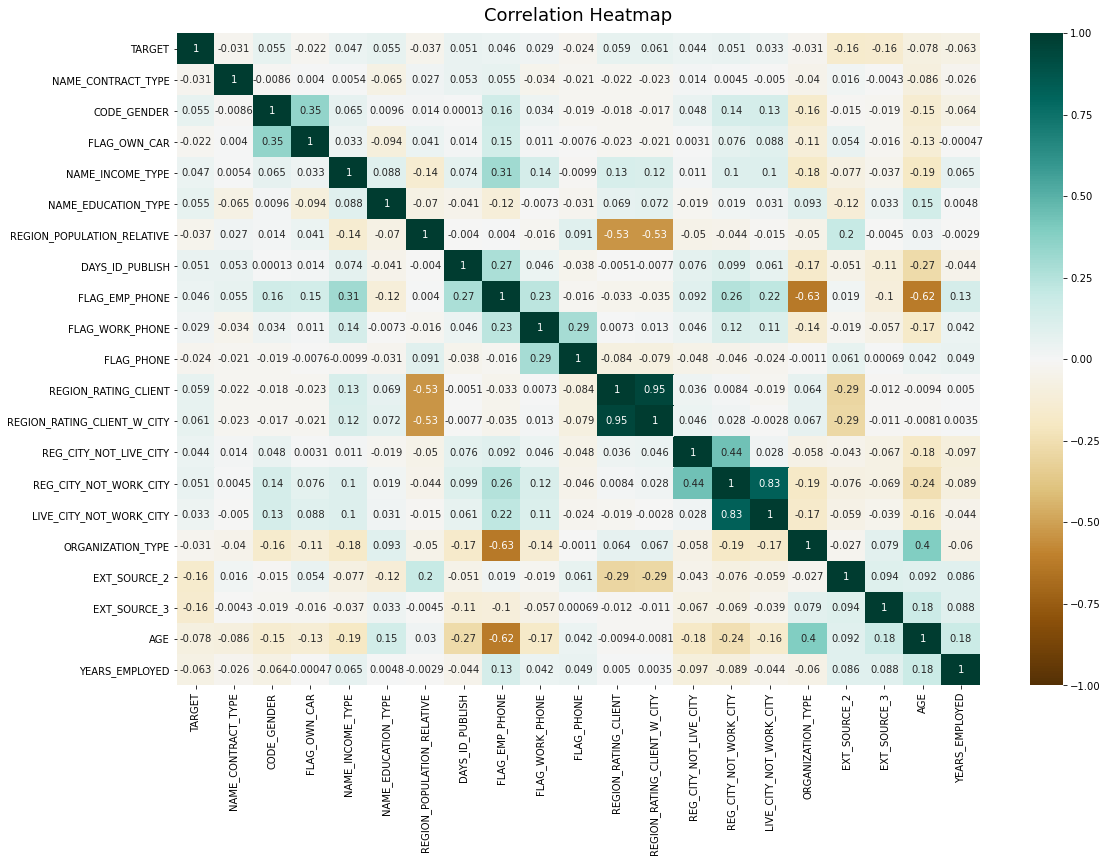

In [15]:
from sklearn.feature_selection import SelectKBest, chi2
feature_selector_vis = SelectKBest(chi2, k=21)
data_train_top_20 = pd.DataFrame(
    feature_selector_vis.fit_transform(data_train_drop_scaled, data_train_drop_scaled['TARGET']))
data_train_top_20.columns = data_train_drop.columns[feature_selector_vis.get_support()]

plt.figure(figsize=(18, 12))
heatmap = sns.heatmap(data_train_top_20.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

### Data Visualization

In [17]:
data_visualize = data_train_top_20.copy()
for c in data_train_top_20.columns:
    data_visualize[c] = min_max_scaler_dict[c].inverse_transform(data_train_top_20[[c]])
for c in np.intersect1d(list(data_train_top_20.columns), list(categorical_features)):
    data_visualize[c] = encoder[c].inverse_transform(data_visualize[c].astype(int))

In [71]:
data_visualize['TARGET'].value_counts()

0.0    282686
1.0     24825
Name: TARGET, dtype: int64

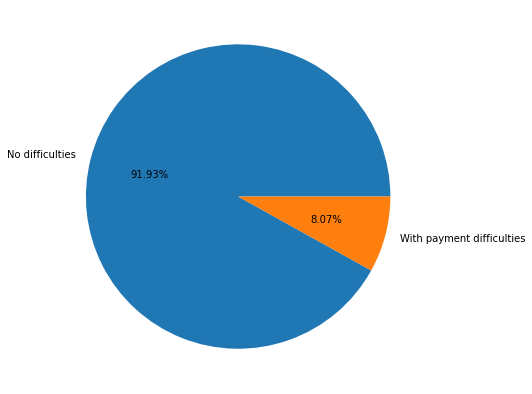

In [76]:
pie = data_visualize[['TARGET', 'AGE']].groupby('TARGET').count()
plt.figure(figsize=(7, 7))
plt.pie(pie.values.ravel() / sum(pie.values.ravel()), autopct="%1.2f%%", labels=['No difficulties', 'With payment difficulties'])
plt.show()

#### Categorical Feature plot

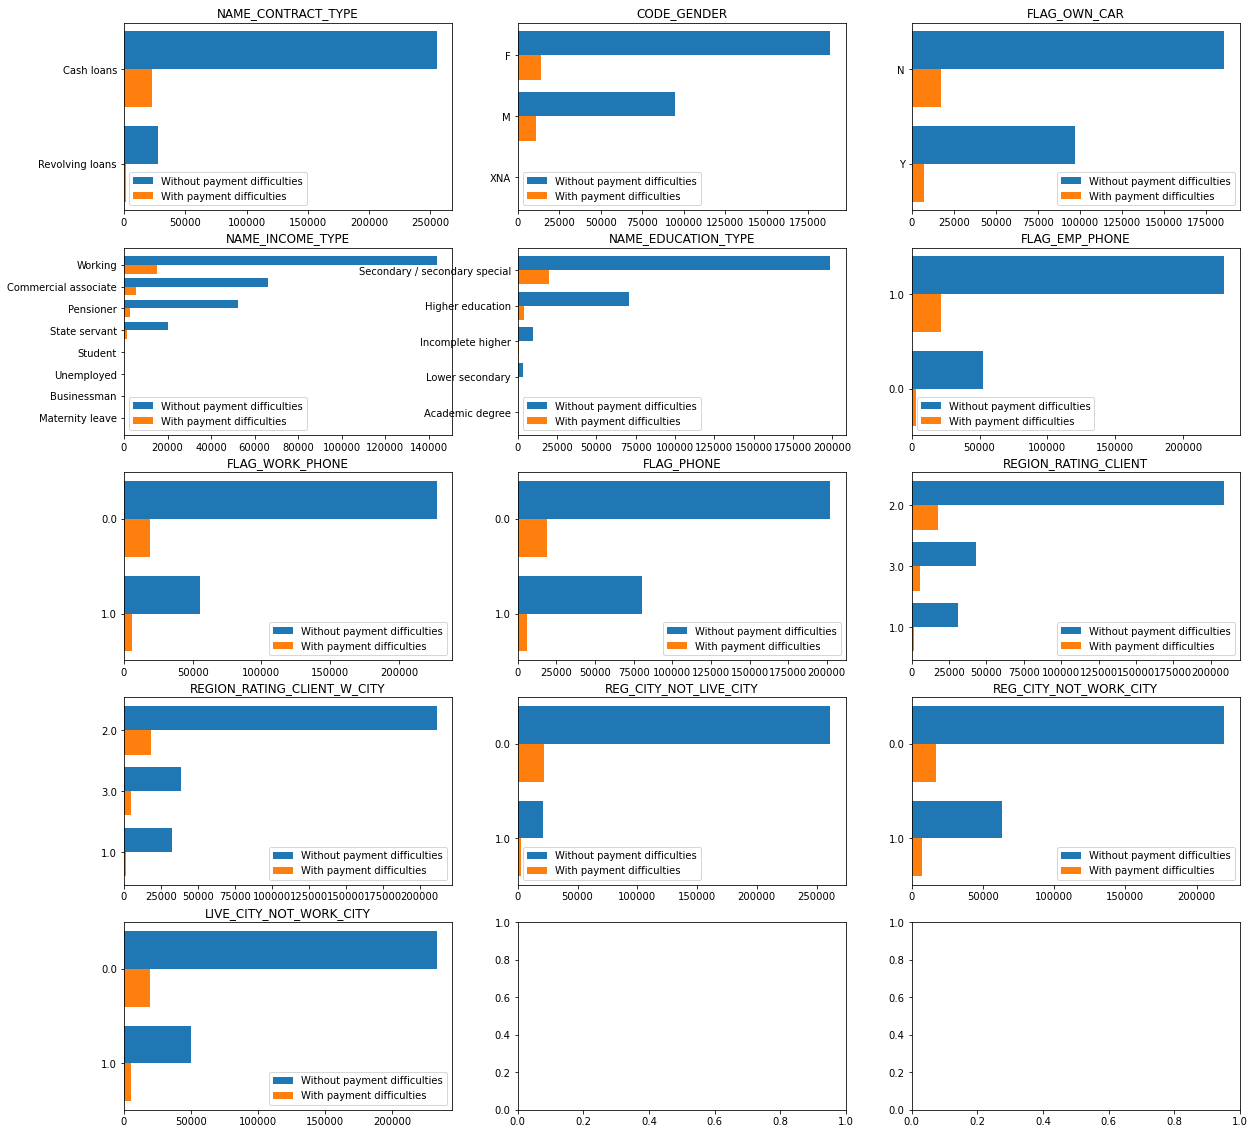

In [18]:
col_visualize = data_train_top_20.columns[1:]
categorical_features_list = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_INCOME_TYPE','FLAG_OWN_CAR', 'NAME_EDUCATION_TYPE', 
'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 
'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

fig, ax = plt.subplots(5, 3, figsize=(20,20))
i = 0
for row in range(5):
    for col in range(3):
        if i > 19:
            break
        while col_visualize[i] not in categorical_features_list and i < 19:
            i += 1
        if col_visualize[i] in categorical_features_list:
            temp_pd = pd.concat([
                data_visualize[data_visualize['TARGET'] ==0][col_visualize[i]].value_counts(),
                data_visualize[data_visualize['TARGET'] ==1][col_visualize[i]].value_counts()],
                axis=1,).fillna(0)
            temp_pd.columns = ['Without payment difficulties', 'With payment difficulties']
            X_axis = np.arange(len(temp_pd.index))
            ax[row][col].barh(X_axis - 0.2, temp_pd['Without payment difficulties'], 0.4, label = 'Without payment difficulties')
            ax[row][col].barh(X_axis + 0.2, temp_pd['With payment difficulties'], 0.4, label = 'With payment difficulties')
            ax[row][col].set_yticks(X_axis)
            ax[row][col].set_yticklabels(temp_pd.index)
            ax[row][col].invert_yaxis()
            ax[row][col].legend()
            ax[row][col].set_title(col_visualize[i])
        i += 1

#### Numerical Feature Plot

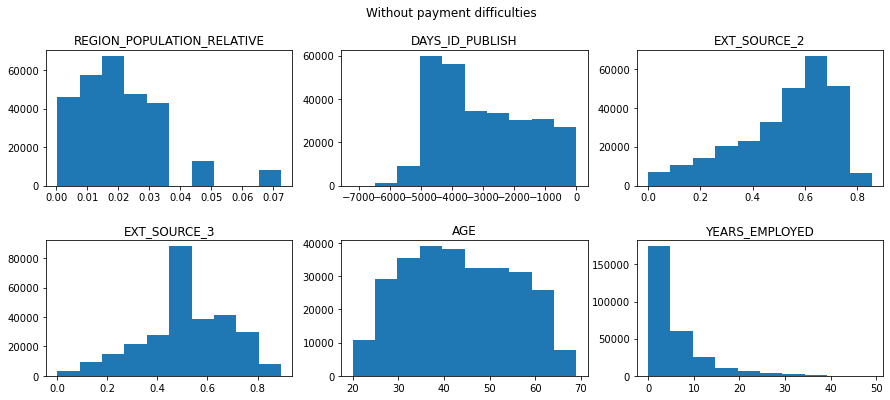

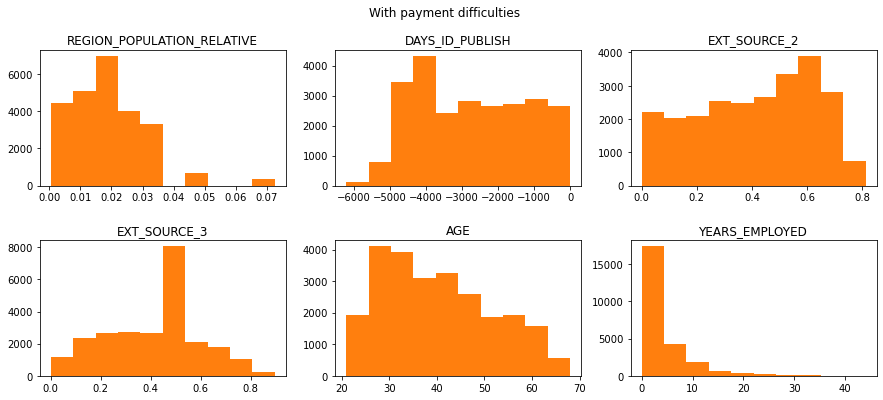

In [20]:
for idx, target in enumerate(['Without payment difficulties', 'With payment difficulties']):
    i = 0
    fig, ax = plt.subplots(2, 3, figsize=(15,6))
    plt.subplots_adjust(hspace=0.4)
    fig.suptitle(target)
    for row in range(2):
        for col in range(3):
            if i > 19:
                break
            while col_visualize[i] in categorical_features_list+['ORGANIZATION_TYPE']:
                i += 1 
            if True:
                hist_1 = data_visualize[data_visualize['TARGET']==idx][col_visualize[i]]
                color = 'tab:orange' if idx==1 else 'tab:blue'
                ax[row][col].hist(data_visualize[data_visualize['TARGET']==idx][col_visualize[i]], color=color)
                ax[row][col].set_title(col_visualize[i])
            i += 1

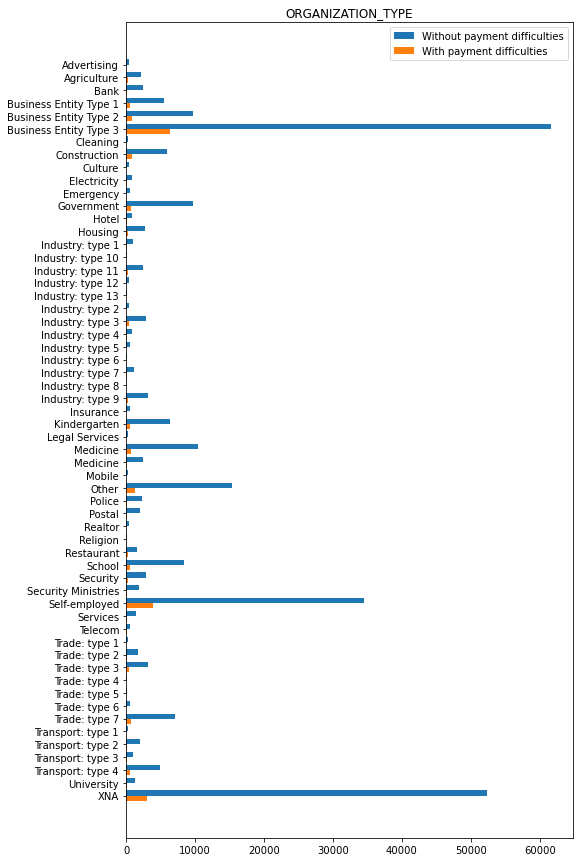

In [21]:
# PLot the Organization type
org_type_df = pd.concat([
    data_train_top_20[data_train_top_20['TARGET'] ==0]['ORGANIZATION_TYPE'].value_counts(),
    data_train_top_20[data_train_top_20['TARGET'] ==1]['ORGANIZATION_TYPE'].value_counts()],
    axis=1,
    ).fillna(0)
org_type_df.columns = ['Without payment difficulties', 'With payment difficulties']
org_type_df.index = encoder['ORGANIZATION_TYPE'].inverse_transform(
    min_max_scaler_dict['ORGANIZATION_TYPE'].inverse_transform([org_type_df.index]).squeeze().astype(int))

wo_pd = org_type_df['Without payment difficulties']
w_pd = org_type_df['With payment difficulties']
  
X_axis = np.arange(len(org_type_df.index))

plt.figure(figsize=(8, 15))
plt.barh(X_axis - 0.2, wo_pd, 0.4, label = 'Without payment difficulties')
plt.barh(X_axis + 0.2, w_pd, 0.4, label = 'With payment difficulties')
plt.yticks(X_axis, org_type_df.index, ha='right')
plt.gca().invert_yaxis()
plt.title('ORGANIZATION_TYPE')
plt.legend()
plt.show()

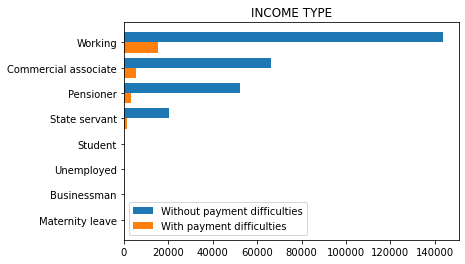

,Without payment difficulties,With payment difficulties
Working,143550,15224
Commercial associate,66257,5360
Pensioner,52380,2982
State servant,20454,1249
Student,18,0
Unemployed,14,8
Businessman,10,0
Maternity leave,3,2


In [22]:
plt.figure(figsize=(6,4))
temp_pd_zz = pd.concat([
    data_visualize[data_visualize['TARGET'] ==0]['NAME_INCOME_TYPE'].value_counts(),
    data_visualize[data_visualize['TARGET'] ==1]['NAME_INCOME_TYPE'].value_counts()],
    axis=1,).fillna(0).astype(int)
temp_pd_zz.columns = ['Without payment difficulties', 'With payment difficulties']
X_axis_zz = np.arange(len(temp_pd_zz.index))
plt.barh(X_axis_zz - 0.2, temp_pd_zz['Without payment difficulties'], 0.4, label = 'Without payment difficulties')
plt.barh(X_axis_zz + 0.2, temp_pd_zz['With payment difficulties'], 0.4, label = 'With payment difficulties')
plt.yticks(X_axis_zz, temp_pd_zz.index, ha='right')
plt.gca().invert_yaxis()
plt.legend()
plt.title('INCOME TYPE')
plt.show()
temp_pd_zz

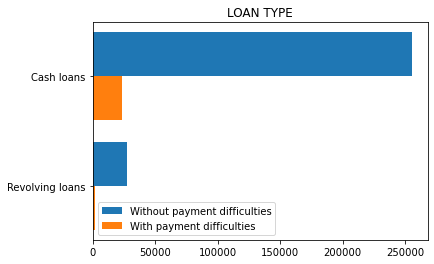

,Without payment difficulties,With payment difficulties
Cash loans,255011,23221
Revolving loans,27675,1604


In [23]:
plt.figure(figsize=(6,4))
temp_pd_zz = pd.concat([
    data_visualize[data_visualize['TARGET'] ==0]['NAME_CONTRACT_TYPE'].value_counts(),
    data_visualize[data_visualize['TARGET'] ==1]['NAME_CONTRACT_TYPE'].value_counts()],
    axis=1,).fillna(0).astype(int)
temp_pd_zz.columns = ['Without payment difficulties', 'With payment difficulties']
X_axis_zz = np.arange(len(temp_pd_zz.index))
plt.barh(X_axis_zz - 0.2, temp_pd_zz['Without payment difficulties'], 0.4, label = 'Without payment difficulties')
plt.barh(X_axis_zz + 0.2, temp_pd_zz['With payment difficulties'], 0.4, label = 'With payment difficulties')
plt.yticks(X_axis_zz, temp_pd_zz.index, ha='right')
plt.gca().invert_yaxis()
plt.legend()
plt.title('LOAN TYPE')
plt.show()
temp_pd_zz

In [24]:
contract_type = data_train[['TARGET', 'NAME_CONTRACT_TYPE', 'SK_ID_CURR']].groupby(['NAME_CONTRACT_TYPE', 'TARGET']).count()
print('without payment difficulty percentage:')
print(f"Cash loans: {round((contract_type.loc['Cash loans'].loc[0] / (contract_type.loc['Cash loans'].sum())) * 100, 2)[0]} %")
print(f"Revolving loans: {round((contract_type.loc['Revolving loans'].loc[0] / (contract_type.loc['Revolving loans'].sum())) * 100, 2)[0]} %")
# Total loan sum
contract_type2 = data_train[['NAME_CONTRACT_TYPE', 'AMT_CREDIT']].groupby('NAME_CONTRACT_TYPE').sum()\
    .apply(lambda x: '%.5f' % x, axis=1).astype(float)
print("Total loan amount percentage:")
for i in contract_type2.index: print(f"{i}: {round(contract_type2.loc[i]/contract_type2.sum() * 100, 2)} %")

without payment difficulty percentage:
Cash loans: 91.65 %
Revolving loans: 94.52 %
Total loan amount percentage:
Cash loans: 94.85 %
Revolving loans: 5.15 %


In [25]:
region = data_train[['REGION_RATING_CLIENT_W_CITY', 'SK_ID_CURR']].groupby('REGION_RATING_CLIENT_W_CITY').count()
print("Customer count percentage:")
for i in region.index: print(f"{i}: {round(region.loc[i]/region.sum() * 100, 2).values[0]} %")
# Total loan sum
temp = data_train[['REGION_RATING_CLIENT_W_CITY', 'AMT_CREDIT']].groupby('REGION_RATING_CLIENT_W_CITY').sum()\
    .apply(lambda x: '%.5f' % x, axis=1).astype(float)
print("Total loan amount percentage:")
for i in temp.index: print(f"{i}: {round(temp.loc[i]/temp.sum() * 100, 2)} %")

Customer count percentage:
1: 11.11 %
2: 74.63 %
3: 14.26 %
Total loan amount percentage:
1: 14.06 %
2: 72.47 %
3: 13.47 %


In the analysis above, we can see that areas in category 2 have far more customers than the number of customers in categories 1 and 3. In the future, Home Credit Indonesia should be able to maximize their marketing potential in category 1 and 3 areas.

### Modeling or Machine Learning Implementation

#### Resample the data
our data is imbalanced, so we will resampling our data to balance them.

In [27]:
from imblearn.under_sampling import RandomUnderSampler

features_train = data_train_top_20.drop('TARGET', axis=1).copy().astype(float)
labels_train = data_train_top_20[['TARGET']].copy().astype(float)

rus = RandomUnderSampler(random_state=42)
features_train_resample, labels_train_resample = rus.fit_resample(features_train, labels_train)
pd.concat([features_train_resample, labels_train_resample], axis=1).groupby('TARGET').count()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,REGION_POPULATION_RELATIVE,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,AGE,YEARS_EMPLOYED
TARGET,,,,,,,,,,,,,,,,,,,,
0.0,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825
1.0,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825


#### Hyper parameter tuning
We will use hyper parameter tuning to determine the best parameters for each of our models.

In [29]:
from sklearn.model_selection import GridSearchCV
def search_params(results: GridSearchCV):

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))
    print('BEST PARAMS: {}\n'.format(results.best_params_))

#### Logistic Regression

In [34]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

lr = LogisticRegression()
lr_params = {
    'C': [0.001, 0.005, 0.01, 0.05, 0.1, 1, 10, 100]
}
lr_cv = GridSearchCV(lr, lr_params, cv=3, verbose=3)
lr_cv.fit(features_train_resample, labels_train_resample.values)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 1/3] END ...........................C=0.001;, score=0.657 total time=   0.0s
[CV 2/3] END ...........................C=0.001;, score=0.659 total time=   0.0s
[CV 3/3] END ...........................C=0.001;, score=0.660 total time=   0.0s
[CV 1/3] END ...........................C=0.005;, score=0.670 total time=   0.0s
[CV 2/3] END ...........................C=0.005;, score=0.665 total time=   0.0s
[CV 3/3] END ...........................C=0.005;, score=0.673 total time=   0.0s
[CV 1/3] END ............................C=0.01;, score=0.671 total time=   0.0s
[CV 2/3] END ............................C=0.01;, score=0.666 total time=   0.0s
[CV 3/3] END ............................C=0.01;, score=0.674 total time=   0.0s
[CV 1/3] END ............................C=0.05;, score=0.671 total time=   0.1s
[CV 2/3] END ............................C=0.05;, score=0.668 total time=   0.1s
[CV 3/3] END ............................C=0.05;,

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.005, 0.01, 0.05, 0.1, 1, 10, 100]},
             verbose=3)

In [35]:
search_params(lr_cv)

0.659 (+/-0.003) for {'C': 0.001}
0.67 (+/-0.007) for {'C': 0.005}
0.671 (+/-0.007) for {'C': 0.01}
0.672 (+/-0.008) for {'C': 0.05}
0.672 (+/-0.007) for {'C': 0.1}
0.672 (+/-0.007) for {'C': 1}
0.672 (+/-0.006) for {'C': 10}
0.672 (+/-0.006) for {'C': 100}
BEST PARAMS: {'C': 10}



##### SVM

In [36]:
svc = SVC()
svc_params = {
    'kernel': ['linear', 'rbf'],
    'C': [0.001, 0.005, 0.01, 0.05, 0.1, 1, 10, 100]
}
svc_cv = GridSearchCV(svc, svc_params, cv=3, verbose=3)
svc_cv.fit(features_train_resample, labels_train_resample.values)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END ............C=0.001, kernel=linear;, score=0.658 total time= 1.2min
[CV 2/3] END ............C=0.001, kernel=linear;, score=0.661 total time= 1.2min
[CV 3/3] END ............C=0.001, kernel=linear;, score=0.663 total time= 1.2min
[CV 1/3] END ...............C=0.001, kernel=rbf;, score=0.627 total time= 2.9min
[CV 2/3] END ...............C=0.001, kernel=rbf;, score=0.635 total time= 2.8min
[CV 3/3] END ...............C=0.001, kernel=rbf;, score=0.629 total time= 2.9min
[CV 1/3] END ............C=0.005, kernel=linear;, score=0.670 total time= 1.4min
[CV 2/3] END ............C=0.005, kernel=linear;, score=0.667 total time= 1.4min
[CV 3/3] END ............C=0.005, kernel=linear;, score=0.674 total time= 1.7min
[CV 1/3] END ...............C=0.005, kernel=rbf;, score=0.650 total time= 2.8min
[CV 2/3] END ...............C=0.005, kernel=rbf;, score=0.655 total time= 2.6min
[CV 3/3] END ...............C=0.005, kernel=rbf;

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.001, 0.005, 0.01, 0.05, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf']},
             verbose=3)

In [39]:
search_params(svc_cv)

0.661 (+/-0.004) for {'C': 0.001, 'kernel': 'linear'}
0.631 (+/-0.007) for {'C': 0.001, 'kernel': 'rbf'}
0.67 (+/-0.006) for {'C': 0.005, 'kernel': 'linear'}
0.652 (+/-0.005) for {'C': 0.005, 'kernel': 'rbf'}
0.671 (+/-0.006) for {'C': 0.01, 'kernel': 'linear'}
0.663 (+/-0.001) for {'C': 0.01, 'kernel': 'rbf'}
0.671 (+/-0.007) for {'C': 0.05, 'kernel': 'linear'}
0.672 (+/-0.003) for {'C': 0.05, 'kernel': 'rbf'}
0.672 (+/-0.007) for {'C': 0.1, 'kernel': 'linear'}
0.672 (+/-0.004) for {'C': 0.1, 'kernel': 'rbf'}
0.672 (+/-0.007) for {'C': 1, 'kernel': 'linear'}
0.672 (+/-0.006) for {'C': 1, 'kernel': 'rbf'}
0.672 (+/-0.007) for {'C': 10, 'kernel': 'linear'}
0.668 (+/-0.004) for {'C': 10, 'kernel': 'rbf'}
0.672 (+/-0.007) for {'C': 100, 'kernel': 'linear'}
0.653 (+/-0.004) for {'C': 100, 'kernel': 'rbf'}
BEST PARAMS: {'C': 1, 'kernel': 'rbf'}



##### Random Forest Classifier

In [37]:
rf = RandomForestClassifier()
rf_params = {
    'n_estimators': [5, 20, 250],
    'max_depth': [2, 4, 8, 16, 32]
}
rf_cv = GridSearchCV(rf, rf_params, cv=3, verbose=3)
rf_cv.fit(features_train_resample, labels_train_resample.values.ravel())

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV 1/3] END .......max_depth=2, n_estimators=5;, score=0.610 total time=   0.0s
[CV 2/3] END .......max_depth=2, n_estimators=5;, score=0.631 total time=   0.0s
[CV 3/3] END .......max_depth=2, n_estimators=5;, score=0.638 total time=   0.0s
[CV 1/3] END ......max_depth=2, n_estimators=20;, score=0.653 total time=   0.1s
[CV 2/3] END ......max_depth=2, n_estimators=20;, score=0.655 total time=   0.1s
[CV 3/3] END ......max_depth=2, n_estimators=20;, score=0.646 total time=   0.1s
[CV 1/3] END .....max_depth=2, n_estimators=250;, score=0.655 total time=   2.4s
[CV 2/3] END .....max_depth=2, n_estimators=250;, score=0.658 total time=   2.5s
[CV 3/3] END .....max_depth=2, n_estimators=250;, score=0.660 total time=   2.6s
[CV 1/3] END .......max_depth=4, n_estimators=5;, score=0.652 total time=   0.0s
[CV 2/3] END .......max_depth=4, n_estimators=5;, score=0.649 total time=   0.0s
[CV 3/3] END .......max_depth=4, n_estimators=5;

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 8, 16, 32],
                         'n_estimators': [5, 20, 250]},
             verbose=3)

In [40]:
search_params(rf_cv)

0.626 (+/-0.024) for {'max_depth': 2, 'n_estimators': 5}
0.652 (+/-0.008) for {'max_depth': 2, 'n_estimators': 20}
0.658 (+/-0.004) for {'max_depth': 2, 'n_estimators': 250}
0.652 (+/-0.006) for {'max_depth': 4, 'n_estimators': 5}
0.663 (+/-0.008) for {'max_depth': 4, 'n_estimators': 20}
0.666 (+/-0.006) for {'max_depth': 4, 'n_estimators': 250}
0.659 (+/-0.007) for {'max_depth': 8, 'n_estimators': 5}
0.669 (+/-0.003) for {'max_depth': 8, 'n_estimators': 20}
0.672 (+/-0.005) for {'max_depth': 8, 'n_estimators': 250}
0.633 (+/-0.003) for {'max_depth': 16, 'n_estimators': 5}
0.658 (+/-0.003) for {'max_depth': 16, 'n_estimators': 20}
0.671 (+/-0.006) for {'max_depth': 16, 'n_estimators': 250}
0.614 (+/-0.002) for {'max_depth': 32, 'n_estimators': 5}
0.644 (+/-0.001) for {'max_depth': 32, 'n_estimators': 20}
0.665 (+/-0.005) for {'max_depth': 32, 'n_estimators': 250}
BEST PARAMS: {'max_depth': 8, 'n_estimators': 250}



#### Model Evaluation

In [41]:
models = {
    'LR': lr_cv.best_estimator_,
    'SVM': svc_cv.best_estimator_,
    'RF': rf_cv.best_estimator_
    }

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
def eval_model(name, model, features, labels):
    pred = model.predict(features)
    acc = accuracy_score(labels, pred)
    prec = precision_score(labels, pred)
    rec = recall_score(labels, pred)
    f_1 = f1_score(labels, pred)
    roc_auc = roc_auc_score(labels, pred)
    print(f"{name}:\n     accuracy: {acc:.4f} | precision: {prec:.4f}\n     recall: {rec:.4f} | f_1: {f_1:.4f}\n     roc_auc: {roc_auc:.4f}")

for model in models:
    eval_model(model, models[model], features_train_resample, labels_train_resample)

LR:
     accuracy: 0.6719 | precision: 0.6750
     recall: 0.6632 | f_1: 0.6690
     roc_auc: 0.6719
SVM:
     accuracy: 0.6844 | precision: 0.6851
     recall: 0.6823 | f_1: 0.6837
     roc_auc: 0.6844
RF:
     accuracy: 0.6913 | precision: 0.6931
     recall: 0.6865 | f_1: 0.6898
     roc_auc: 0.6913


#### K-Fold Cross-Validation

In [45]:
from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits=10, shuffle=True, random_state=20)

new_lr = LogisticRegression(C=10) # From the best previous hyperparameter
new_lr_f1 = cross_val_score(new_lr, features_train_resample, labels_train_resample.values.ravel(), cv=kfold, n_jobs=-1, scoring='f1')
new_lr_roc_auc = cross_val_score(new_lr, features_train_resample, labels_train_resample.values.ravel(), cv=kfold, n_jobs=-1, scoring='roc_auc')

new_svc = SVC(C= 1, kernel= 'rbf') # From the best previous hyperparameter
new_svc_f1 = cross_val_score(new_svc, features_train_resample, labels_train_resample.values.ravel(), cv=kfold, n_jobs=-1, scoring='f1')
new_svc_roc_auc = cross_val_score(new_svc,features_train_resample, labels_train_resample.values.ravel(), cv=kfold, n_jobs=-1, scoring='roc_auc')

new_rf = RandomForestClassifier(n_estimators=250, max_depth=8) # From the best previous hyperparameter
new_rf_f1 = cross_val_score(new_rf, features_train_resample, labels_train_resample.values.ravel(), cv=kfold, n_jobs=-1, scoring='f1')
new_rf_roc_auc = cross_val_score(new_rf, features_train_resample, labels_train_resample.values.ravel(), cv=kfold, n_jobs=-1, scoring='roc_auc')

In [46]:
print(f"Random Forest:\n    \
F1: {np.mean(new_rf_f1):.3f} +/- {np.std(new_rf_f1):.3f} | ROC_AUC: {np.mean(new_rf_roc_auc):.3f} +/- {np.std(new_rf_roc_auc):.3f}\n\
Logistic Regression:\n    \
F1: {np.mean(new_lr_f1):.3f} +/- {np.std(new_lr_f1):.3f} | ROC_AUC: {np.mean(new_lr_roc_auc):.3f} +/- {np.std(new_lr_roc_auc):.3f}\n\
Support Vector Machine:\n    \
F1: {np.mean(new_svc_f1):.3f} +/- {np.std(new_svc_f1):.3f} | ROC_AUC: {np.mean(new_svc_roc_auc):.3f} +/- {np.std(new_svc_roc_auc):.3f}")

Random Forest:
    F1: 0.669 +/- 0.007 | ROC_AUC: 0.732 +/- 0.007
Logistic Regression:
    F1: 0.668 +/- 0.008 | ROC_AUC: 0.734 +/- 0.008
Support Vector Machine:
    F1: 0.672 +/- 0.008 | ROC_AUC: 0.732 +/- 0.009


We will chose Random Forest model for the test data prediction because Random Forest have the highest both F1 score and ROC_AUC score.

We will tune the hyper parameter once more for only Random Forest Classifier.

In [47]:
final_rf = RandomForestClassifier()
final_rf_params = {
    'n_estimators': [200, 225, 250, 275, 300],
    'max_depth': [6, 7, 8, 9, 10]
}
final_rf_cv = GridSearchCV(rf, rf_params, cv=5, verbose=3, n_jobs=-1, scoring=['f1', 'roc_auc'], refit='roc_auc')
final_rf_cv.fit(features_train_resample, labels_train_resample.values.ravel())

print(final_rf_cv.best_params_)
print(f"{final_rf_cv.best_score_:.3f}")

Fitting 5 folds for each of 15 candidates, totalling 75 fits
{'max_depth': 8, 'n_estimators': 250}
0.732


#### Prediction

In [63]:
# Load the test dataset
data_test = pd.read_csv('home credit default risk/application_test.csv')
data_test['AGE'] = data_test['DAYS_BIRTH']//-365
data_test.drop(columns=['DAYS_BIRTH'], inplace=True)

data_test['YEARS_EMPLOYED'] = data_test['DAYS_EMPLOYED']//-365
data_test.drop(columns=['DAYS_EMPLOYED'], inplace=True)
data_test['YEARS_EMPLOYED'].replace({data_test['YEARS_EMPLOYED'].min(): np.nan}, inplace=True)
features_test = data_test[features_train_resample.columns].copy()

print(features_test.isnull().sum())


NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
REGION_POPULATION_RELATIVE        0
DAYS_ID_PUBLISH                   0
FLAG_EMP_PHONE                    0
FLAG_WORK_PHONE                   0
FLAG_PHONE                        0
REGION_RATING_CLIENT              0
REGION_RATING_CLIENT_W_CITY       0
REG_CITY_NOT_LIVE_CITY            0
REG_CITY_NOT_WORK_CITY            0
LIVE_CITY_NOT_WORK_CITY           0
ORGANIZATION_TYPE                 0
EXT_SOURCE_2                      8
EXT_SOURCE_3                   8668
AGE                               0
YEARS_EMPLOYED                 9274
dtype: int64


In [64]:
# Encode the categorical columns
for feature in encoder.keys():
    try:
        features_test[feature] = encoder[feature].transform(features_test[feature])
    except:
        continue

# Scale using MinMaxscaler
for feature in features_test.columns:
    features_test[feature] = min_max_scaler_dict[feature].transform(features_test[[feature]])
features_test['EXT_SOURCE_2'] = features_test['EXT_SOURCE_2'].apply(lambda x: x if str(x)!="nan" else np.random.choice(features_test[feature].dropna().values))
features_test['EXT_SOURCE_3'] = features_test['EXT_SOURCE_3'].apply(lambda x: x if str(x)!="nan" else np.random.choice(features_test[feature].dropna().values))
features_test['YEARS_EMPLOYED'] = features_test['YEARS_EMPLOYED'].fillna(0)
# Get prediction
result = final_rf_cv.best_estimator_.predict(features_test)
result = pd.concat([data_test['SK_ID_CURR'], pd.DataFrame(result)], axis=1)
result.columns = ['SK_ID_CURR', 'TARGET']
result.to_csv('test_result.csv', index=False)

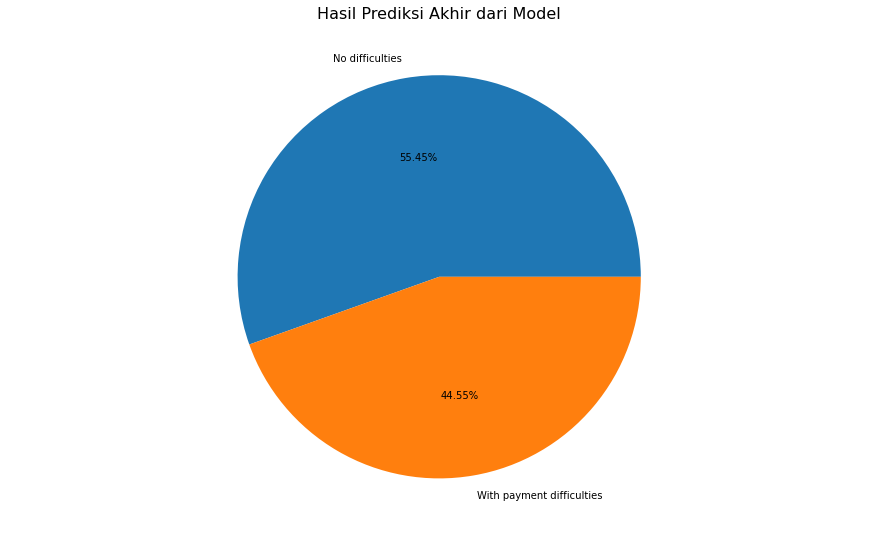

In [75]:
result = pd.read_csv('test_result.csv')

label=['No difficulties', 'With payment difficulties']
count = result['TARGET'].value_counts()

fig = plt.figure(figsize=(12,7))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')

ax.pie(count, labels = label, autopct='%1.2f%%')

plt.title('Hasil Prediksi Akhir dari Model', size=16)
plt.show()

